Resolveremos el problema en dimención uno

$$
-\Delta u=\lambda u+1
$$

con condición inicial $u(0)=u(1)=0$

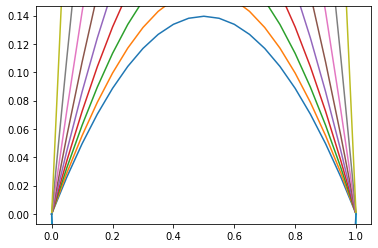

In [7]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
from math import log


    # definig mesh
mesh = IntervalMesh(20, 0, 1)

    # definig Function space on this mesh using Lagrange polynoimals of degree 2.
V = FunctionSpace(mesh, "CG", 2)


    # definign boundary values
#u0 = Constant(0)


    
    
u_L = Constant(0) 

#Expression('1 + 2*x[1]*x[1]', degree=2)

def boundary_L(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], 0, tol)

bc_L = DirichletBC(V, u_L, boundary_L)   
    
    
    
u_R  = Constant(0) 


#Expression('2 + 2*x[1]*x[1]', degree=2)

def boundary_R(x, on_boundary):
    tol = 1E-14
    return on_boundary and near(x[0], 1, tol)



bc_R = DirichletBC(V, u_R, boundary_R)
    
    
    
    
    
bcs = [bc_L, bc_R]






x = np.arange(19)
y =np.arange(19)


    
    
    
for i in range(1,20):


     # Setting up the variational problem
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Constant(1)
    g = Constant(1)
    a = inner(grad(u), grad(v))*dx - i*inner(u,v)*dx
    L = f*v*dx

     # solving the variational problem.
    u = Function(V)
    #solve( a == L, u, bc)
    solve(a == L, u, bcs)
     # plotting solution
        
    max=u(0.5)    
    x[i-1]=i
    y[i-1]=abs(max)    
        
        
   
    
   
    
   # max=u(0.5)
    
    if i<12: 
        plot(u)
    
    
   # x[i-1]=i
    #y[i-1]=abs(max)
    
    
    #print("el máximo para lambda=", i, "es: ", max)
    

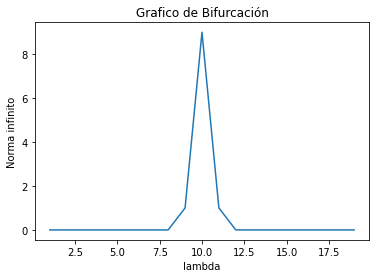

In [2]:
plt.plot(x,y)
plt.xlabel('lambda')
plt.ylabel('Norma infinito')
plt.title('Grafico de Bifurcación')
plt.show()